In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date')
df
# Clean data
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]



In [2]:
def draw_line_plot():
	# Draw line plot
	fig, axs = plt.subplots()
	plt.plot(df['date'], df['value'])

	plt.xlabel('Date')
	plt.ylabel('Page Views')
	plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

	# Save image and return fig (don't change this part)
	fig.savefig('line_plot.png')
	return fig



In [11]:
def draw_bar_plot():
	# Copy and modify data for monthly bar plot
	months = [
		'January',
		'February',
		'March',
		'April',
		'May',
		'June',
		'July',
		'August',
		'September',
		'October',
		'November',
		'December'
	]


	df_bar = df.copy()
	df_bar['Years'] = df_bar['date'].dt.year
	df_bar['Month'] = df_bar['date'].dt.month_name()
	df_bar['Month'] = pd.Categorical(df_bar['date'].dt.month_name(), categories=months, ordered=True)
	df_bar.sort_values(by='Month', inplace=True)
	df_bar['Average Page Views'] = df_bar.groupby(['Years', 'Month'])['value'].transform('mean')

	# Draw bar plot
	fig, axs = plt.subplots()
	sns.barplot(data=df_bar, x='Years', y='Average Page Views', hue='Month')

	# Save image and return fig (don't change this part)
	fig.savefig('bar_plot.png')
	return fig



In [9]:
def draw_box_plot():
	# Prepare data for box plots (this part is done!)
	df_box = df.copy()
	df_box.reset_index(inplace=True)
	df_box['Year'] = [d.year for d in df_box.date]
	df_box['Month'] = [d.strftime('%b') for d in df_box.date]

	# Draw box plots (using Seaborn)
	fig, axs = plt.subplots(1, 2)

	sns.boxplot(data=df_box, ax=axs[0], x='Year', y='value')
	sns.boxplot(
		data=df_box, ax=axs[1], x='Month', y='value', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
	)

	axs[0].set_title('Year-wise Box Plot (Trend)')
	axs[0].set_ylabel('Page Views')
	axs[1].set_title('Month-wise Box Plot (Seasonality)')
	axs[1].set_ylabel('Page Views')

	plt.tight_layout()

	# Save image and return fig (don't change this part)
	fig.savefig('box_plot.png')
	return fig




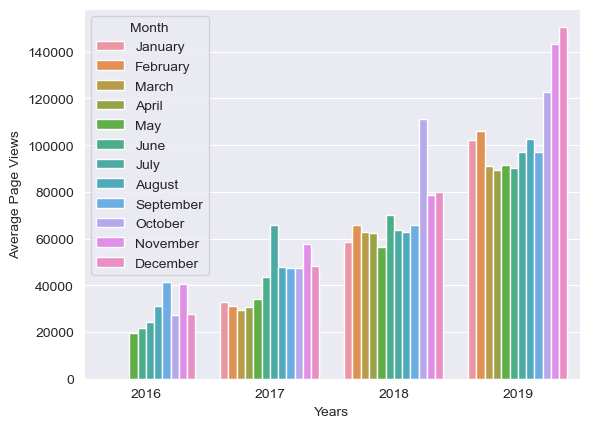

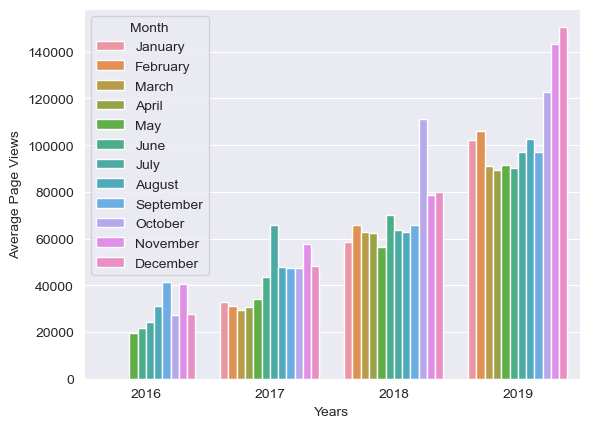

In [10]:
draw_bar_plot()
